# Read and plot ECG rest signal

In [5]:
from sklearn.decomposition import PCA
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import gaussian_kde

In [4]:
# Import .mat data
f = sio.loadmat('REST1_LR.mat') # Rest1
g = sio.loadmat('GAMBLING_LR.mat') # Gamble
h = sio.loadmat('REST2_LR.mat') # Rest2
motor = scipy.io.loadmat('MOTOR_LR.mat') # Motor LR
motor_rev = scipy.io.loadmat('MOTOR_RL.mat') # Motor RL

pca_REST = PCA(n_components=2).fit(f['task_data'].T)
pca_GAMB = PCA(n_components=2).fit(g['task_data'].T)

In [17]:
i=1
#plt.plot(motor['task_IDs'])
len(list(set(motor['task_IDs'].tolist()[0])))
color
sum(motor['task_IDs'][0]==100206)

len(motor['task_data'][i] )   / len(motor['task_IDs'][0])

1.0

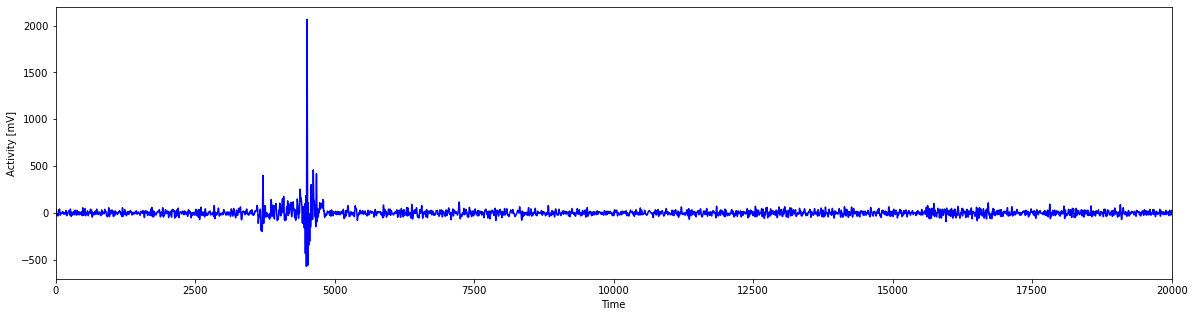

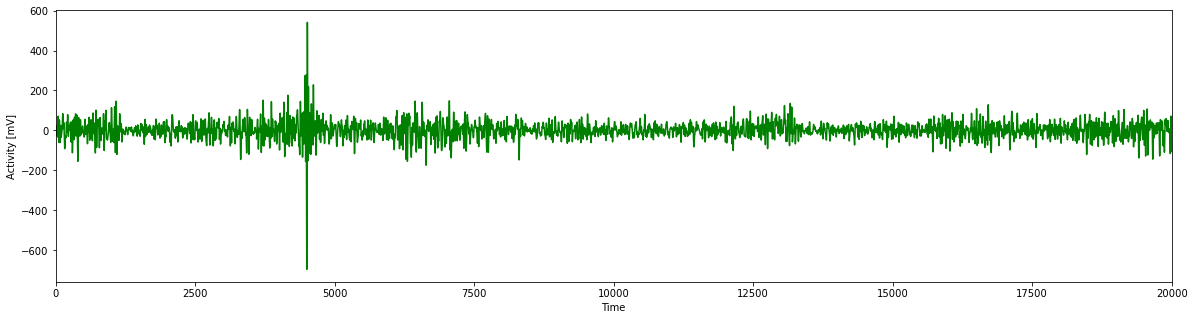

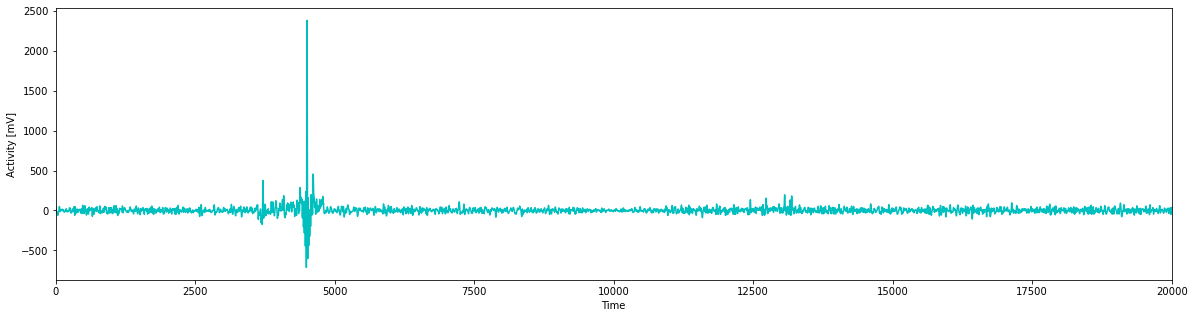

In [38]:
color = list(mcolors.BASE_COLORS.keys())
color[7] = 'lightblue'

def float_to_rgb(x):
    norm = mpl.colors.Normalize(vmin=-20, vmax=10)
    cmap = cm.hot
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(x)

def plot_a_series(i):
    plt.figure(figsize=(20,5))
    plt.plot(f['task_data'][i], c = color[i%len(color)])
    plt.ylabel('Activity [mV]')
    plt.xlabel('Time')
    #plt.ylim([-500,500])
    plt.xlim([0,20000])

plot_a_series(0)
plot_a_series(1);
plot_a_series(3);

In [31]:
color[15%len(color)]

'w'

In [24]:
norm = mpl.colors.Normalize(vmin=-20, vmax=10)
cmap = cm.hot
x = 0.3

m = cm.ScalarMappable(norm=norm, cmap=cmap)
print(m.to_rgba(x))


(1.0, 0.8225486412996345, 0.0, 1.0)


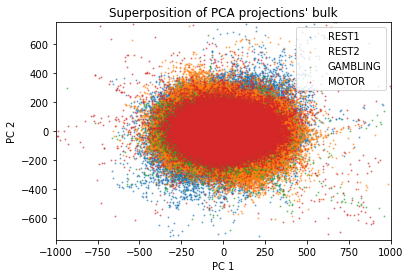

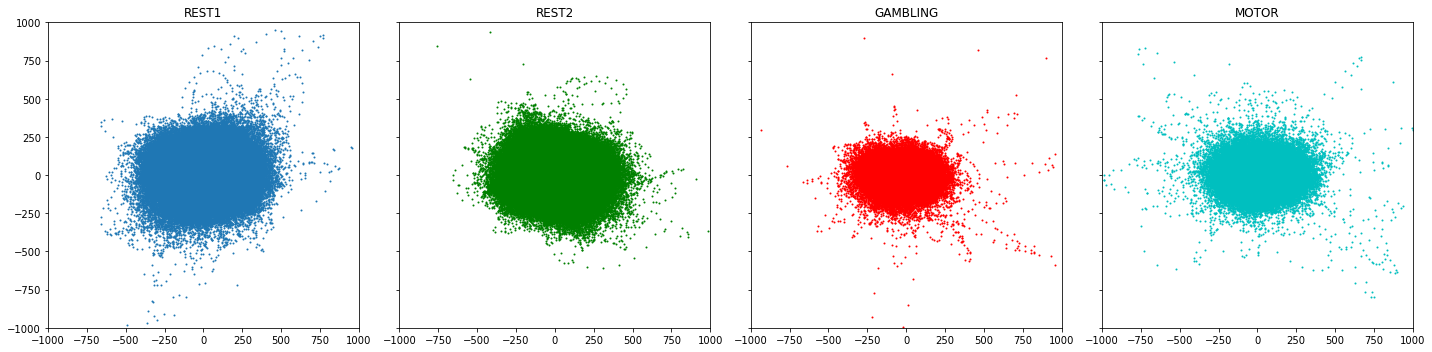

In [221]:

'''
pca = PCA(n_components=2)
B = pca_REST.transform(f['task_data'].T)
C = PCA(n_components=2).fit_transform(h['task_data'].T)
D = pca_GAMB.transform(g['task_data'].T)
'''
E = PCA(n_components=2).fit_transform(motor['task_data'].T)


plt.title("Superposition of PCA projections' bulk")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.scatter(B[:,0],B[:,1], s=1, alpha= 0.5,  label='REST1');
plt.scatter(C[:,0],C[:,1], s=1, alpha= 0.5,  label='REST2');
plt.scatter(D[:,0],D[:,1], s=1, alpha= 0.5,  label='GAMBLING');
plt.scatter(E[:,0],E[:,1], s=1, alpha= 0.5,  label='MOTOR');
plt.ylim([-750,750])
plt.xlim([-1000,1000])
plt.legend(loc='upper right')

fig = plt.figure(figsize=(20,5))
ax = fig.subplots(1,4, sharey=True, sharex=True)
ax[0].scatter(B[:,0],B[:,1], s=1, label='REST1');
ax[0].set_title('REST1')
ax[1].scatter(C[:,0],C[:,1], s=1, c =color[1]); ax[1].set_title('REST2');
ax[2].scatter(D[:,0],D[:,1], s=1,  c = color[2]); ax[2].set_title('GAMBLING');
ax[3].scatter(E[:,0],E[:,1], s=1,  c = color[3]); ax[3].set_title('MOTOR');

plt.ylim([-1000,1000])
plt.xlim([-1000,1000])
plt.tight_layout()

In [ ]:
np.sum(PCA(n_components=2).fit(h['task_data'].T).explained_variance_ratio_)

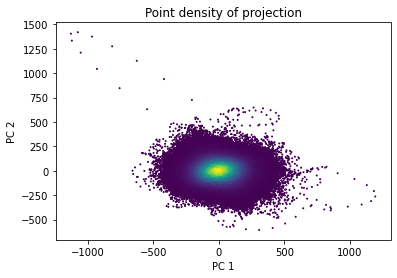

In [165]:


xy = np.vstack([B[:,0],B[:,1]])
z = gaussian_kde(xy)(xy)

plt.scatter(B[:,0],B[:,1], c=z, s=1)
plt.title('Point density of projection')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

(-1000.0, 1000.0)

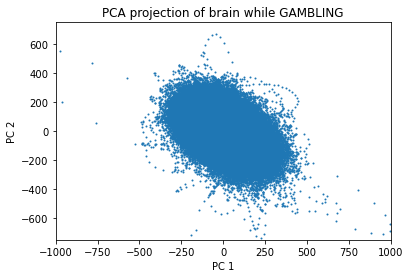

In [163]:
pca = PCA(n_components=2)
B = pca_GAMB.transform(f['task_data'].T)

plt.title('PCA projection of brain while GAMBLING')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.scatter(B[:,0],B[:,1], s=1);
#plt.scatter(B[-100000:,0],B[-100000:,1], s=1, label='burn-in')
plt.ylim([-750,750])
plt.xlim([-1000,1000])

In [144]:

def plot_bars(f):
    pca.fit(f['task_data'][:,:100000].T)
    fig = plt.figure();
    fig,ax= plt.subplots(figsize=(20, 10), ncols=2, nrows=1,sharey=True);
    for i in range(0,2):
        ax[i].bar(range(0,100),pca.components_[i])
        #ax[i].set_xticks(range(100))
        #ax[i].set_xticklabels(list(range(0,100)),rotation = 90)
        ax[i].set_title("Loadings of PC "+str(i+1))


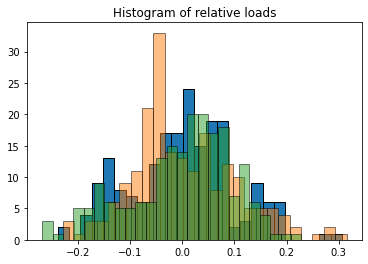

In [185]:
pca.fit(f['task_data'].T)
plt.hist(pca.components_.flatten(),25,edgecolor='black', alpha=1)
pca.fit(g['task_data'].T)
plt.hist(pca.components_.flatten(),25,edgecolor='black',alpha=0.5);
pca.fit(h['task_data'].T)
plt.hist(pca.components_.flatten(),25,edgecolor='black',alpha=0.5);
plt.title('Histogram of relative loads');

<BarContainer object of 100 artists>

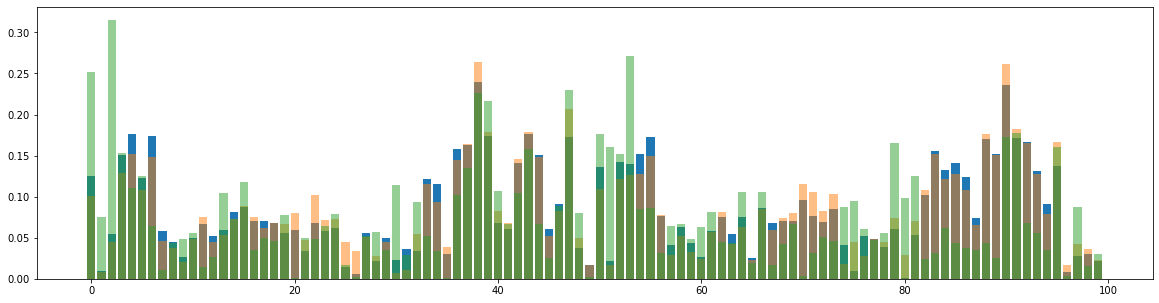

In [188]:
plt.figure(figsize=(20,5))
pca.fit(f['task_data'].T)
plt.bar(range(0,100),np.abs(pca.components_[0]))
pca.fit(h['task_data'].T)  
plt.bar(range(0,100),np.abs(pca.components_[0]),alpha=0.5)
pca.fit(g['task_data'].T) 
plt.bar(range(0,100),np.abs(pca.components_[0]),alpha=0.5)
 

<Figure size 432x288 with 0 Axes>

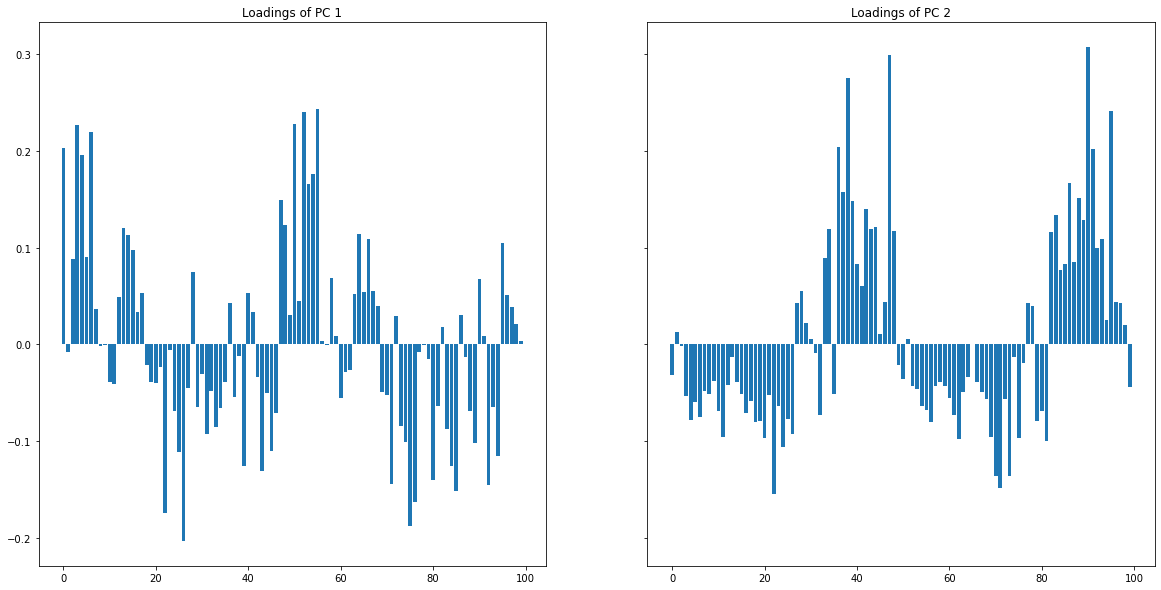

<Figure size 432x288 with 0 Axes>

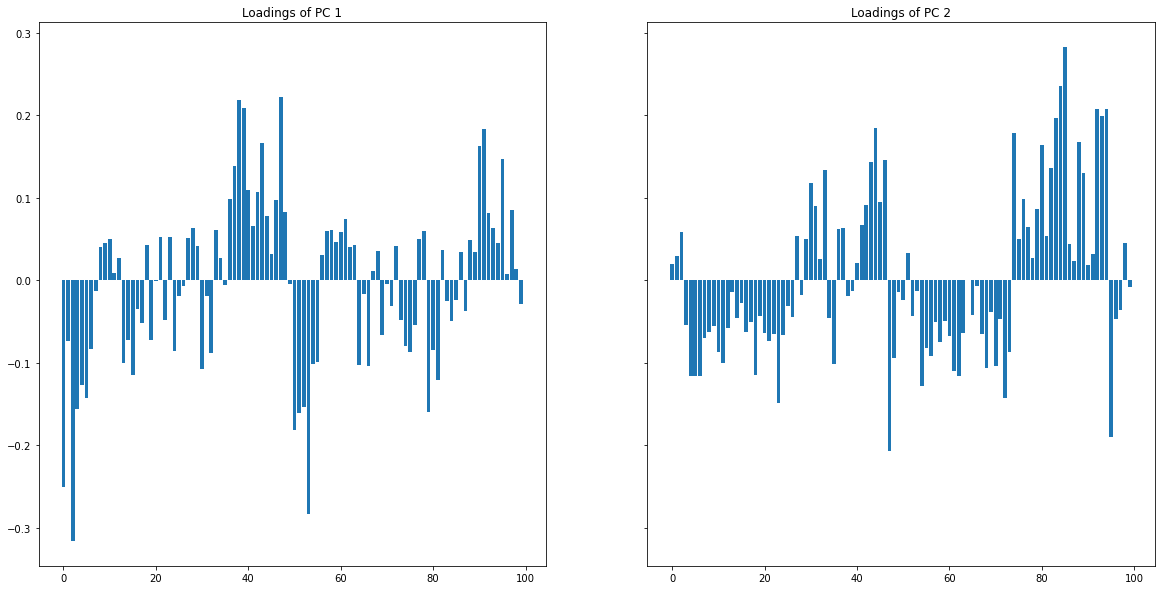

In [179]:
plot_bars(f)
plot_bars(g)

<BarContainer object of 100 artists>

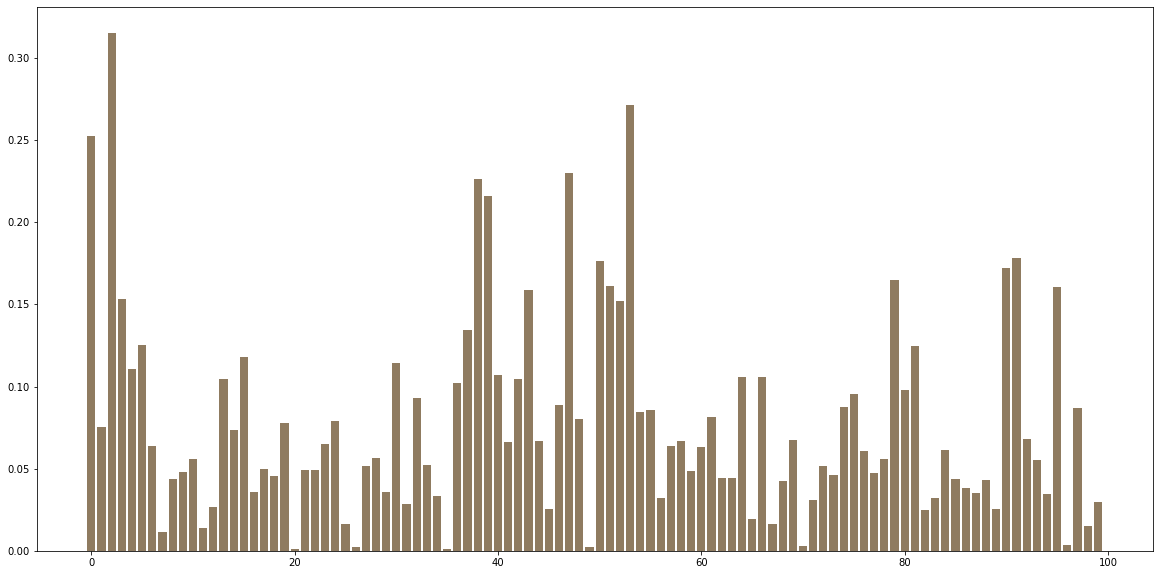

In [157]:
plt.figure(figsize=[20,10])

plt.bar(range(0,100),abs(pca_REST.components_[0]), label = 'Rest')
plt.bar(range(0,100),abs(pca_GAMB.components_[0]), label = 'Gambling',alpha=0.5)